Pendiente (coeficiente): -2.2663251231527095
Intercepto: 48.13142857142857


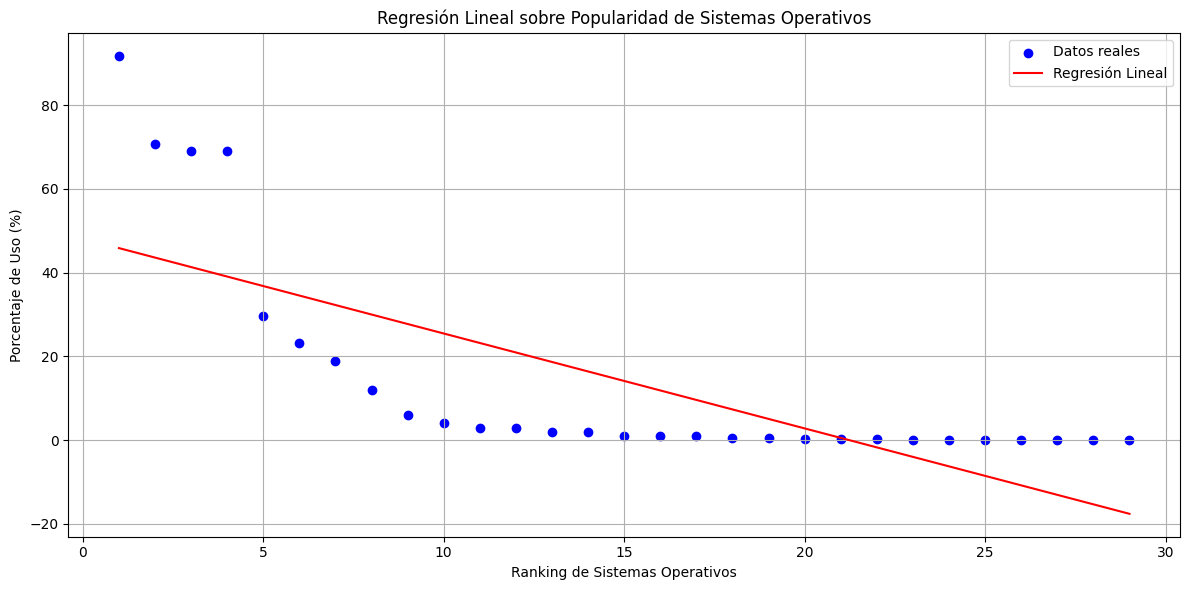

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Ruta al archivo CSV
archivo_csv = "Sistemasoperativos.csv"

# Cargar el archivo CSV
df = pd.read_csv(archivo_csv)

# Limpiar valores nulos
df = df.dropna(subset=["Usage"])

# Asegurarse de que "Usage" es texto
df["Usage"] = df["Usage"].astype(str)

# Eliminar símbolo '%' y convertir a float
try:
    df["Usage"] = df["Usage"].str.replace('%', '').astype(float)
except ValueError as e:
    print("Error al convertir la columna 'Usage':", e)
    print(df["Usage"].unique())  # Muestra valores únicos para diagnosticar

# Crear un índice ficticio como variable independiente
df = df.sort_values(by="Usage", ascending=False).reset_index(drop=True)
df["Ranking"] = np.arange(1, len(df) + 1)

# Separar las variables independiente (Ranking) y dependiente (Usage)
X = df[["Ranking"]].values  # Variable independiente
y = df["Usage"].values       # Variable dependiente

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Generar predicciones
y_pred = model.predict(X)

# Mostrar los coeficientes del modelo
print("Pendiente (coeficiente):", model.coef_[0])
print("Intercepto:", model.intercept_)

# Graficar los datos reales y la regresión lineal
plt.figure(figsize=(12, 6))
plt.scatter(df["Ranking"], df["Usage"], color="blue", label="Datos reales")
plt.plot(df["Ranking"], y_pred, color="red", label="Regresión Lineal")

# Etiquetas y título
plt.xlabel("Ranking de Sistemas Operativos")
plt.ylabel("Porcentaje de Uso (%)")
plt.title("Regresión Lineal sobre Popularidad de Sistemas Operativos")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()
